# DSC530 - Final Term Project
## Janine Par 

In [1]:
import numpy as np  
import pandas as pd  

import sys
from operator import itemgetter

import first
import thinkstats2

import json
import datetime
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', 800)


# Business Data

### Get Restaurant Data

In [2]:
bus = pd.read_json("yelp_academic_dataset_business.json", lines=True)
bus.columns.values
#bus.categories.value_counts().sort_index()

array(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'], dtype=object)

In [3]:
#Filter out null categories then get only categories like restraurant, food and bar
bus= bus[~bus['categories'].isnull()]
bus_rest = bus.query('categories.str.contains("Restaurants") or categories.str.contains("Food")', engine='python')
bus_rest.categories
bus_rest.shape

(64616, 14)

### Star Rating 

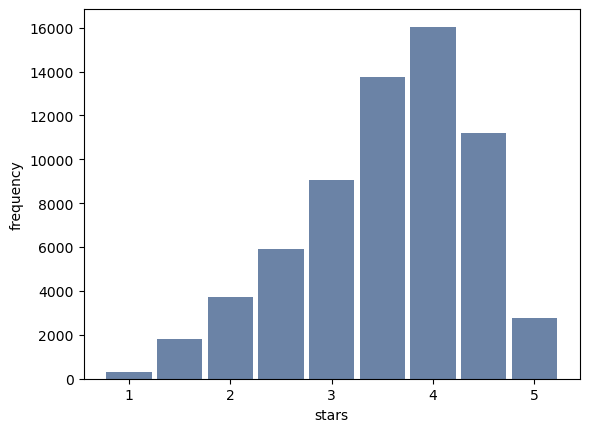

In [4]:
hist_rc = thinkstats2.Hist(bus_rest.stars)
import thinkplot
thinkplot.Hist(hist_rc)
thinkplot.Config(xlabel='stars', ylabel='frequency')

In [6]:
stars_mean=bus_rest.stars.mean()
stars_var=bus_rest.stars.var()
stars_std=bus_rest.stars.std()

stars_mean, stars_var, stars_std

(3.54595610994181, 0.7291771776143263, 0.8539187183885398)

### Review Count

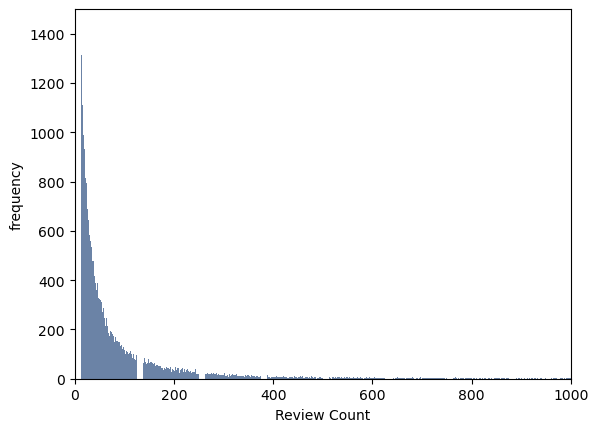

In [5]:
hist_rc = thinkstats2.Hist(bus_rest.review_count)
import thinkplot
axis = [0, 1000, 0, 1500]
thinkplot.Hist(hist_rc)
thinkplot.Config(xlabel='Review Count', ylabel='frequency', axis=axis)

In [8]:
rc_mean=bus_rest.review_count.mean()
rc_var=bus_rest.review_count.var()
rc_std=bus_rest.review_count.std()

rc_mean, rc_var, rc_std

(76.61408938962487, 30062.005678761034, 173.38398333975672)

In [10]:
bus_rest.describe()


,latitude,longitude,stars,review_count,is_open,attribute_count
count,64616.000000,64616.000000,64616.000000,64616.000000,64616.000000,64616.000000
mean,36.969131,-88.095324,3.545956,76.614089,0.689953,5.894175
std,6.019271,14.024538,0.853919,173.383983,0.462516,3.053842
min,27.564457,-120.083748,1.000000,5.000000,0.000000,0.000000
25%,32.207349,-90.247145,3.000000,12.000000,0.000000,4.000000
50%,39.479423,-86.048171,3.500000,28.000000,1.000000,6.000000
75%,39.958128,-75.346978,4.000000,75.000000,1.000000,8.000000
max,53.679197,-74.661348,5.000000,7568.000000,1.000000,17.000000


### Get the number of Features or Attribute that is true for the establishment

In [9]:
    attributes_count = []
    for idx, row in bus_rest['attributes'].iteritems():
        att_count = 0
        if row is None:
             attributes_count.append(att_count) #This is to Handle rows without Attributes or column is NonType
        else:
            for i in row:
                if row[i] == "True":
                    att_count = att_count + 1
                    #print(att_count)
            attributes_count.append(att_count)
    bus_rest['attribute_count']=attributes_count    

C:\Users\janin\AppData\Local\Temp\ipykernel_3728\3678255082.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus_rest['attribute_count']=attributes_count


### attribute_count histogram

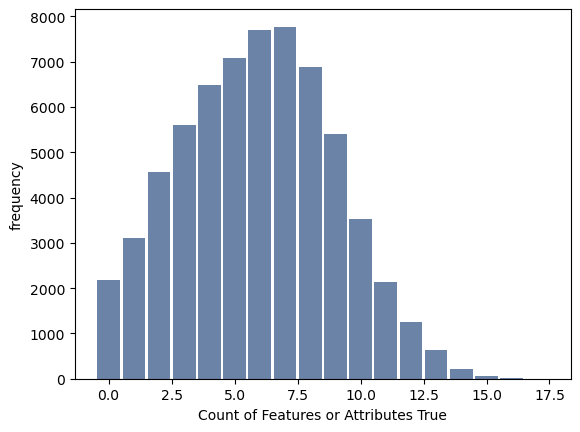

In [10]:
hist_ac = thinkstats2.Hist(bus_rest.attribute_count)
import thinkplot
thinkplot.Hist(hist_ac)
thinkplot.Config(xlabel='Count of Features or Attributes True', ylabel='frequency')

### Get Price Range 

In [11]:
RestaurantsPriceRange2=[]
for idx, row in bus_rest['attributes'].iteritems():
    if row is None:
        RestaurantsPriceRange2.append(None) #This is to Handle rows without Attributes or column is NonType
    else:
        l=row.keys()
        if 'RestaurantsPriceRange2' in l:
            RestaurantsPriceRange2.append(row['RestaurantsPriceRange2'])
        else:
            RestaurantsPriceRange2.append(None)
     
bus_rest['RestaurantsPriceRange2']=RestaurantsPriceRange2

C:\Users\janin\AppData\Local\Temp\ipykernel_3728\3203000271.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus_rest['RestaurantsPriceRange2']=RestaurantsPriceRange2


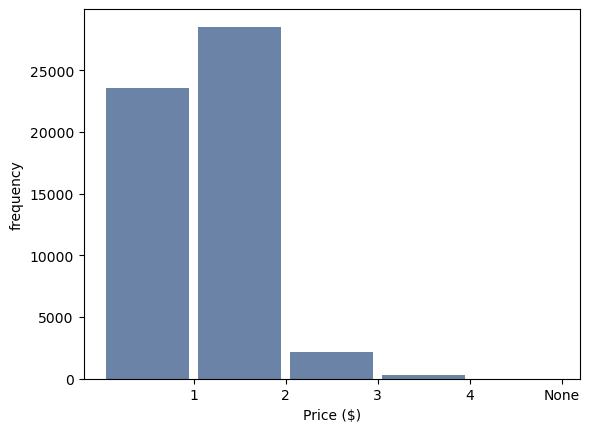

In [24]:
hist_price = thinkstats2.Hist(bus_rest.RestaurantsPriceRange2)
import thinkplot
thinkplot.Hist(hist_price)
thinkplot.Config(xlabel='Price ($)', ylabel='frequency')

# CHECK-IN DATA

In [12]:
df_checkin = pd.read_json("yelp_academic_dataset_checkin.json", lines=True)
print(df_checkin.columns.values)

['business_id' 'date']


### Count the number of checkin date from the date fields which is comma delimited

In [13]:
df_checkin.head()

# Get the count of check-in date
df_checkin['checkin_count'] = df_checkin.date.str.count(',') 

#Validate if correct 
df_checkin[df_checkin.business_id=='el83zfEgg_5bBz5Et9rZ6Q']    

,business_id,date,checkin_count
87962,el83zfEgg_5bBz5Et9rZ6Q,"2019-12-24 00:14:38, 2020-03-08 18:44:04, 2020-03-08 18:44:38, 2020-04-03 21:59:24, 2020-04-21 23:05:03, 2020-08-27 21:47:02, 2020-09-13 22:00:34, 2020-10-10 22:44:51, 2021-02-22 23:26:57, 2021-03-21 18:53:10, 2021-04-09 23:38:36, 2021-04-27 22:13:12, 2021-05-07 23:36:26, 2021-06-04 18:15:18, 2021-06-30 22:41:55, 2021-07-02 21:35:04, 2021-07-04 19:47:17, 2021-09-12 23:24:59",17


Join to get the business details

In [15]:
df_checkin_bus=df_checkin.join(bus_rest.set_index('business_id'), on='business_id', how='inner')
df_checkin_bus.shape

df_checkin_bus.head(1)

,business_id,date,checkin_count,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,attribute_count,RestaurantsPriceRange2
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020-07-24 22:42:27, 2020-10-24 21:36:13, 2020-12-09 21:23:33, 2021-01-20 17:34:57, 2021-04-30 21:02:03, 2021-05-25 21:16:54, 2021-08-06 21:08:08, 2021-10-02 15:15:42, 2021-11-11 16:23:50",10,Frankie's Raw Bar,4903 State Rd 54,New Port Richey,FL,34652,28.217288,-82.733344,4.5,24,1,"{'Alcohol': 'u'none'', 'OutdoorSeating': 'True', 'BusinessAcceptsCreditCards': 'True', 'RestaurantsTakeOut': 'True', 'Ambience': '{'touristy': False, 'hipster': False, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': True, 'casual': False}', 'BikeParking': 'True', 'RestaurantsReservations': 'False', 'DogsAllowed': 'True', 'HasTV': 'False', 'RestaurantsDelivery': 'False', 'WiFi': 'u'no'', 'BusinessAcceptsBitcoin': 'False', 'WheelchairAccessible': 'True', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}', 'RestaurantsTableService': 'True', 'BYOB': 'True', 'Corkage': 'False', 'Caters': 'True'}","Seafood, Restaurants, Latin American, Food, Food Trucks","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-21:0', 'Friday': '11:0-22:0', 'Saturday': '11:0-22:0'}",9,None


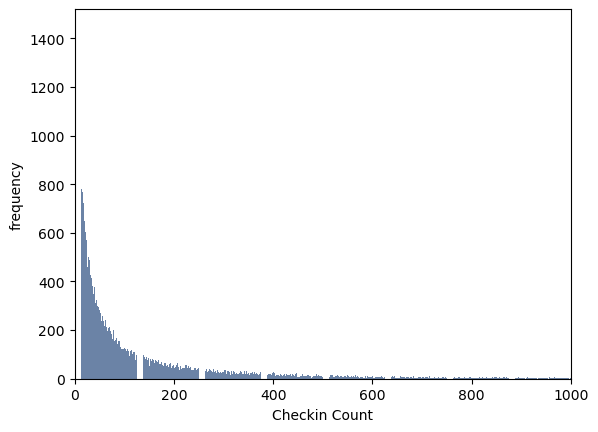

In [16]:
hist_ci = thinkstats2.Hist(df_checkin_bus.checkin_count)
import thinkplot
thinkplot.Hist(hist_ci)
thinkplot.Config(xlabel='Checkin Count', ylabel='frequency' , xlim=[0, 1000])

Get the Checkin Date

In [18]:
df_checkin_bus_yr = df_checkin_bus.assign(date=df_checkin.date.str.split(",")).explode('date')

df_checkin_bus_yr.head(2)

,business_id,date,checkin_count,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,attribute_count,RestaurantsPriceRange2
0,---kPU91CF4Lq2-WlRu9Lw,2020-03-13 21:10:56,10,Frankie's Raw Bar,4903 State Rd 54,New Port Richey,FL,34652,28.217288,-82.733344,4.5,24,1,"{'Alcohol': 'u'none'', 'OutdoorSeating': 'True', 'BusinessAcceptsCreditCards': 'True', 'RestaurantsTakeOut': 'True', 'Ambience': '{'touristy': False, 'hipster': False, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': True, 'casual': False}', 'BikeParking': 'True', 'RestaurantsReservations': 'False', 'DogsAllowed': 'True', 'HasTV': 'False', 'RestaurantsDelivery': 'False', 'WiFi': 'u'no'', 'BusinessAcceptsBitcoin': 'False', 'WheelchairAccessible': 'True', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}', 'RestaurantsTableService': 'True', 'BYOB': 'True', 'Corkage': 'False', 'Caters': 'True'}","Seafood, Restaurants, Latin American, Food, Food Trucks","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-21:0', 'Friday': '11:0-22:0', 'Saturday': '11:0-22:0'}",9,None
0,---kPU91CF4Lq2-WlRu9Lw,2020-06-02 22:18:06,10,Frankie's Raw Bar,4903 State Rd 54,New Port Richey,FL,34652,28.217288,-82.733344,4.5,24,1,"{'Alcohol': 'u'none'', 'OutdoorSeating': 'True', 'BusinessAcceptsCreditCards': 'True', 'RestaurantsTakeOut': 'True', 'Ambience': '{'touristy': False, 'hipster': False, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': True, 'casual': False}', 'BikeParking': 'True', 'RestaurantsReservations': 'False', 'DogsAllowed': 'True', 'HasTV': 'False', 'RestaurantsDelivery': 'False', 'WiFi': 'u'no'', 'BusinessAcceptsBitcoin': 'False', 'WheelchairAccessible': 'True', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}', 'RestaurantsTableService': 'True', 'BYOB': 'True', 'Corkage': 'False', 'Caters': 'True'}","Seafood, Restaurants, Latin American, Food, Food Trucks","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-21:0', 'Friday': '11:0-22:0', 'Saturday': '11:0-22:0'}",9,None


Add Year Column from the checkin date

In [19]:
df_checkin_bus_yr['yyyy']=pd.to_datetime(df_checkin_bus_yr['date']).dt.year

df_checkin_bus_yr.head(2)

,business_id,date,checkin_count,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,attribute_count,RestaurantsPriceRange2,yyyy
0,---kPU91CF4Lq2-WlRu9Lw,2020-03-13 21:10:56,10,Frankie's Raw Bar,4903 State Rd 54,New Port Richey,FL,34652,28.217288,-82.733344,4.5,24,1,"{'Alcohol': 'u'none'', 'OutdoorSeating': 'True', 'BusinessAcceptsCreditCards': 'True', 'RestaurantsTakeOut': 'True', 'Ambience': '{'touristy': False, 'hipster': False, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': True, 'casual': False}', 'BikeParking': 'True', 'RestaurantsReservations': 'False', 'DogsAllowed': 'True', 'HasTV': 'False', 'RestaurantsDelivery': 'False', 'WiFi': 'u'no'', 'BusinessAcceptsBitcoin': 'False', 'WheelchairAccessible': 'True', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}', 'RestaurantsTableService': 'True', 'BYOB': 'True', 'Corkage': 'False', 'Caters': 'True'}","Seafood, Restaurants, Latin American, Food, Food Trucks","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-21:0', 'Friday': '11:0-22:0', 'Saturday': '11:0-22:0'}",9,None,2020
0,---kPU91CF4Lq2-WlRu9Lw,2020-06-02 22:18:06,10,Frankie's Raw Bar,4903 State Rd 54,New Port Richey,FL,34652,28.217288,-82.733344,4.5,24,1,"{'Alcohol': 'u'none'', 'OutdoorSeating': 'True', 'BusinessAcceptsCreditCards': 'True', 'RestaurantsTakeOut': 'True', 'Ambience': '{'touristy': False, 'hipster': False, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': True, 'casual': False}', 'BikeParking': 'True', 'RestaurantsReservations': 'False', 'DogsAllowed': 'True', 'HasTV': 'False', 'RestaurantsDelivery': 'False', 'WiFi': 'u'no'', 'BusinessAcceptsBitcoin': 'False', 'WheelchairAccessible': 'True', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}', 'RestaurantsTableService': 'True', 'BYOB': 'True', 'Corkage': 'False', 'Caters': 'True'}","Seafood, Restaurants, Latin American, Food, Food Trucks","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-21:0', 'Friday': '11:0-22:0', 'Saturday': '11:0-22:0'}",9,None,2020


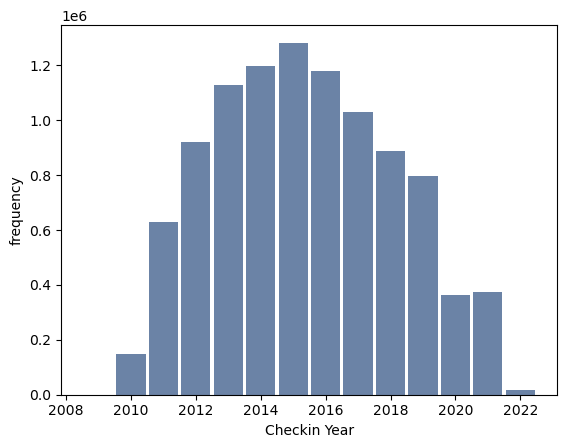

In [31]:
hist_ci_year = thinkstats2.Hist(df_checkin_bus_yr.yyyy)
import thinkplot
thinkplot.Hist(hist_ci_year)
thinkplot.Config(xlabel='Checkin Year', ylabel='frequency' )

In [20]:
ci_mean=df_checkin_bus.checkin_count.mean()
ci_var=df_checkin_bus.checkin_count.var()
ci_std=df_checkin_bus.checkin_count.std()

ci_mean, ci_var, ci_std

(156.29651162790697, 191785.93486167528, 437.93371057921)

In [34]:
df_checkin_bus.describe()


,checkin_count,latitude,longitude,stars,review_count,is_open,attribute_count
count,63296.000000,63296.000000,63296.000000,63296.000000,63296.000000,63296.000000,63296.000000
mean,156.296512,36.948429,-88.085002,3.546883,78.009369,0.692793,5.963299
std,437.933711,6.021782,13.989885,0.847944,174.900021,0.461340,3.031571
min,0.000000,27.564457,-120.083748,1.000000,5.000000,0.000000,0.000000
25%,13.000000,32.202298,-90.244743,3.000000,12.000000,0.000000,4.000000
50%,43.000000,39.474271,-86.052989,3.500000,29.000000,1.000000,6.000000
75%,141.000000,39.957535,-75.351539,4.000000,77.000000,1.000000,8.000000
max,40108.000000,53.679197,-74.661348,5.000000,7568.000000,1.000000,17.000000


# TIP DATA

In [21]:
tip = pd.read_json("yelp_academic_dataset_tip.json", lines=True)
print(tip.columns.values)

['user_id' 'business_id' 'text' 'date' 'compliment_count']


In [22]:
tip=tip.join(bus_rest.set_index('business_id'), on='business_id', how='inner')
tip.shape

(718687, 20)

In [156]:
tip.head(1)

,user_id,business_id,text,date,compliment_count,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,attribute_count,RestaurantsPriceRange2
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban sandwiches,2013-02-05 18:35:10,0,La Segunda Central Bakery,2512 N 15th St,Tampa,FL,33605,27.965865,-82.443197,4.5,339,1,"{'BikeParking': 'True', 'BusinessAcceptsCreditCards': 'True', 'RestaurantsPriceRange2': '1', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}', 'HappyHour': 'False', 'NoiseLevel': ''average'', 'Caters': 'True', 'HasTV': 'False', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': False, 'brunch': False, 'breakfast': True}', 'RestaurantsTakeOut': 'True', 'RestaurantsGoodForGroups': 'True', 'GoodForKids': 'True', 'Ambience': '{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': True}', 'Alcohol': ''none'', 'RestaurantsReservations': 'False', 'RestaurantsTableService': 'False', 'DogsAllowed': 'False', 'Restau...","Bakeries, Restaurants, Coffee & Tea, Food, Cuban","{'Monday': '0:0-0:0', 'Tuesday': '6:30-15:0', 'Wednesday': '6:30-15:0', 'Thursday': '6:30-15:0', 'Friday': '6:30-15:0', 'Saturday': '6:30-15:0', 'Sunday': '6:30-15:0'}",9,1


In [23]:
tip['Year_Tip']=pd.to_datetime(tip['date']).dt.year

tip.head()

,user_id,business_id,text,date,compliment_count,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,attribute_count,RestaurantsPriceRange2,Year_Tip
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban sandwiches,2013-02-05 18:35:10,0,La Segunda Central Bakery,2512 N 15th St,Tampa,FL,33605,27.965865,-82.443197,4.5,339,1,"{'BikeParking': 'True', 'BusinessAcceptsCreditCards': 'True', 'RestaurantsPriceRange2': '1', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}', 'HappyHour': 'False', 'NoiseLevel': ''average'', 'Caters': 'True', 'HasTV': 'False', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': False, 'brunch': False, 'breakfast': True}', 'RestaurantsTakeOut': 'True', 'RestaurantsGoodForGroups': 'True', 'GoodForKids': 'True', 'Ambience': '{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': True}', 'Alcohol': ''none'', 'RestaurantsReservations': 'False', 'RestaurantsTableService': 'False', 'DogsAllowed': 'False', 'Restau...","Bakeries, Restaurants, Coffee & Tea, Food, Cuban","{'Monday': '0:0-0:0', 'Tuesday': '6:30-15:0', 'Wednesday': '6:30-15:0', 'Thursday': '6:30-15:0', 'Friday': '6:30-15:0', 'Saturday': '6:30-15:0', 'Sunday': '6:30-15:0'}",9,1,2013
2956,DWryovIM4VF2vim4p6WYaw,QoezRbYQncpRqyrLH6Iqjg,Turkey and roast beef,2012-10-11 13:04:02,0,La Segunda Central Bakery,2512 N 15th St,Tampa,FL,33605,27.965865,-82.443197,4.5,339,1,"{'BikeParking': 'True', 'BusinessAcceptsCreditCards': 'True', 'RestaurantsPriceRange2': '1', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}', 'HappyHour': 'False', 'NoiseLevel': ''average'', 'Caters': 'True', 'HasTV': 'False', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': False, 'brunch': False, 'breakfast': True}', 'RestaurantsTakeOut': 'True', 'RestaurantsGoodForGroups': 'True', 'GoodForKids': 'True', 'Ambience': '{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': True}', 'Alcohol': ''none'', 'RestaurantsReservations': 'False', 'RestaurantsTableService': 'False', 'DogsAllowed': 'False', 'Restau...","Bakeries, Restaurants, Coffee & Tea, Food, Cuban","{'Monday': '0:0-0:0', 'Tuesday': '6:30-15:0', 'Wednesday': '6:30-15:0', 'Thursday': '6:30-15:0', 'Friday': '6:30-15:0', 'Saturday': '6:30-15:0', 'Sunday': '6:30-15:0'}",9,1,2012
10197,DWryovIM4VF2vim4p6WYaw,QoezRbYQncpRqyrLH6Iqjg,Coffee and baby bread,2012-10-24 12:37:05,0,La Segunda Central Bakery,2512 N 15th St,Tampa,FL,33605,27.965865,-82.443197,4.5,339,1,"{'BikeParking': 'True', 'BusinessAcceptsCreditCards': 'True', 'RestaurantsPriceRange2': '1', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}', 'HappyHour': 'False', 'NoiseLevel': ''average'', 'Caters': 'True', 'HasTV': 'False', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': False, 'brunch': False, 'breakfast': True}', 'RestaurantsTakeOut': 'True', 'RestaurantsGoodForGroups': 'True', 'GoodForKids': 'True', 'Ambience': '{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': True}', 'Alcohol': ''none'', 'RestaurantsReservations': 'False', 'RestaurantsTableService': 'False', 'DogsAllowed': 'False', 'Restau...","Bakeries, Restaurants, Coffee & Tea, Food, Cuban","{'Monday': '0:0-0:0', 'Tuesday': '6:30-15:0', 'Wednesday': '6:30-15:0', 'Thursday': '6:30-15:0', 'Friday': '6:30-15:0', 'Saturday': '6:30-15:0', 'Sunday': '6:30-15:0'}",9,1,2012
12900,boRCdL8ez95KwzWe69VoUg,QoezRbYQncpRqyrLH6Iqjg,Such a great place to come and get a Cuban sandwich. You can smell

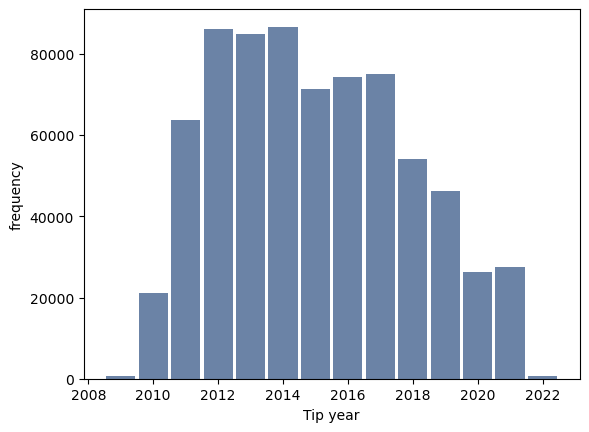

In [24]:
hist_tip = thinkstats2.Hist(tip.Year_Tip)
import thinkplot
thinkplot.Hist(hist_tip)
thinkplot.Config(xlabel='Tip year', ylabel='frequency')

Get the Tip Count per business

In [25]:
tip.business_id.value_counts().sort_index()

tip_bus=tip.business_id.value_counts().sort_index().rename_axis('business_id').reset_index(name='tip_counts')

tip_bus.head()


,business_id,tip_counts
0,---kPU91CF4Lq2-WlRu9Lw,4
1,--0iUa4sNDFiZFrAdIWhZQ,6
2,--7PUidqRWpRSpXebiyxTg,3
3,--8IbOsAAxjKRoYsBFL-PA,4
4,--MbOh2O1pATkXa7xbU6LA,10


In [26]:
df_bus_comb=tip_bus.join(df_checkin_bus.set_index('business_id'), on='business_id', how='inner')

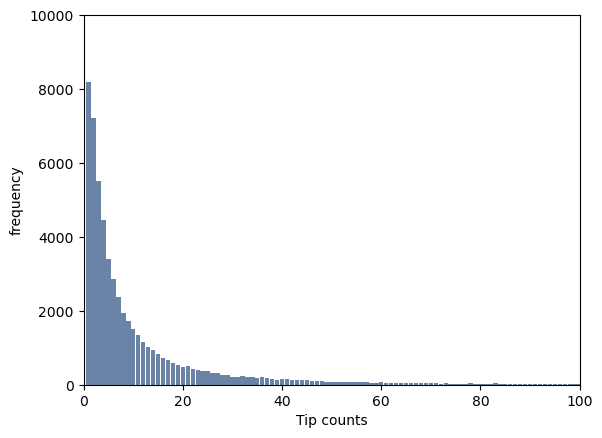

In [27]:
hist_tip = thinkstats2.Hist(df_bus_comb.tip_counts)
import thinkplot
axis = [0, 100, 0, 10000]
thinkplot.Hist(hist_tip)
thinkplot.Config(xlabel='Tip counts', ylabel='frequency', axis=axis)

In [28]:
tip_mean=df_bus_comb.tip_counts.mean()
tip_var=df_bus_comb.tip_counts.var()
tip_std=df_bus_comb.tip_counts.std()

tip_mean, tip_var, tip_std

(12.722685800336611, 708.401640578764, 26.61581560987309)

## Combined Datasets

In [29]:
df_bus_comb.describe()


,tip_counts,checkin_count,latitude,longitude,stars,review_count,is_open,attribute_count
count,56445.000000,56445.000000,56445.000000,56445.000000,56445.000000,56445.000000,56445.000000,56445.000000
mean,12.722686,173.894446,36.884400,-88.078598,3.551918,86.014917,0.686934,6.250687
std,26.615816,460.604403,5.952437,13.998158,0.824607,183.574726,0.463745,2.954395
min,1.000000,0.000000,27.564457,-120.083748,1.000000,5.000000,0.000000,0.000000
25%,2.000000,18.000000,32.192421,-90.246482,3.000000,15.000000,0.000000,4.000000
50%,5.000000,54.000000,39.450709,-86.047180,3.500000,35.000000,1.000000,6.000000
75%,13.000000,164.000000,39.955807,-75.348527,4.000000,88.000000,1.000000,8.000000
max,2571.000000,40108.000000,53.649743,-74.661348,5.000000,7568.000000,1.000000,17.000000


## Compare Two Scenarios

Comparing Variables in business dataset

### Star Rating

In [30]:
df_rest_open=df_bus_comb[df_bus_comb.is_open==1]  # 1 = Open
df_rest_close=df_bus_comb[df_bus_comb.is_open==0] # 0 = Close


In [31]:
hist_open_stars = thinkstats2.Hist(df_rest_open.stars, label="Open")
hist_close_stars = thinkstats2.Hist(df_rest_close.stars, label="Close")

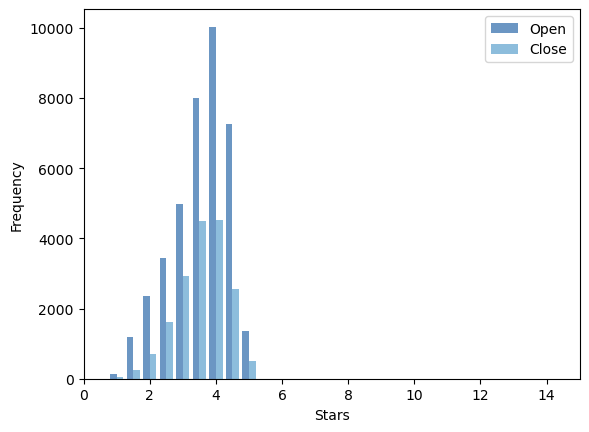

In [32]:
width = 0.2
thinkplot.PrePlot(2)
thinkplot.Hist(hist_open_stars, align='right', width=width)
thinkplot.Hist(hist_close_stars, align='left', width=width)
thinkplot.Config(xlabel='Stars', ylabel='Frequency', xlim=[0, 15])

Dataframe for different scenarios

PMF

In [33]:
df_rest_open=df_bus_comb[df_bus_comb.is_open==1]  # 1 = Open
df_rest_close=df_bus_comb[df_bus_comb.is_open==0] # 0 = Close


df_rest_low=df_bus_comb.query("is_open==1 and stars<=3")  # stars rating low
df_rest_high=df_bus_comb.query("is_open==1 and stars >= 4 ")  # stars rating high


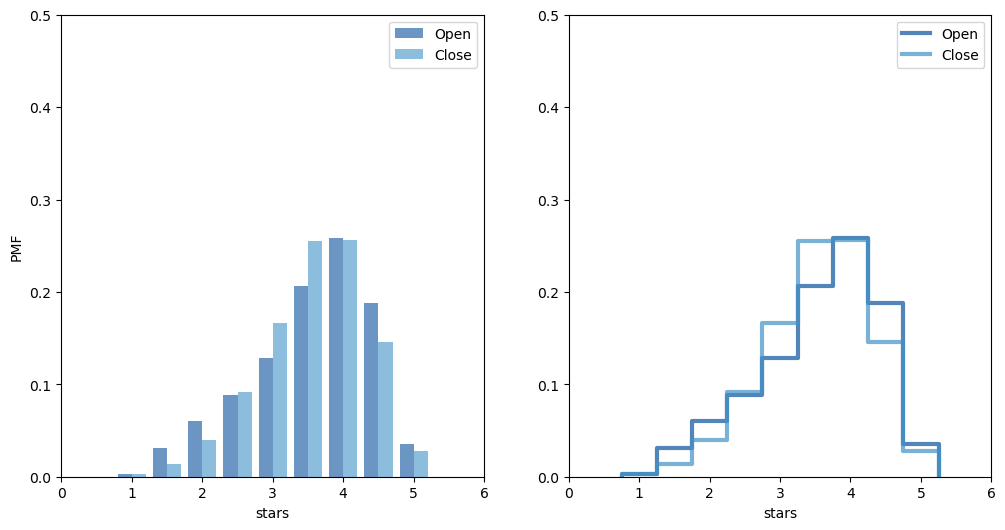

In [35]:
open_pmf = thinkstats2.Pmf(df_rest_open.stars, label="Open")
close_pmf = thinkstats2.Pmf(df_rest_close.stars, label="Close")

width = 0.2
axis = [0, 6, 0, .5]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(open_pmf, align="right", width=width)
thinkplot.Hist(close_pmf, align="left", width=width)
thinkplot.Config(xlabel="stars", ylabel="PMF", axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([open_pmf, close_pmf])
thinkplot.Config(xlabel="stars", axis=axis)

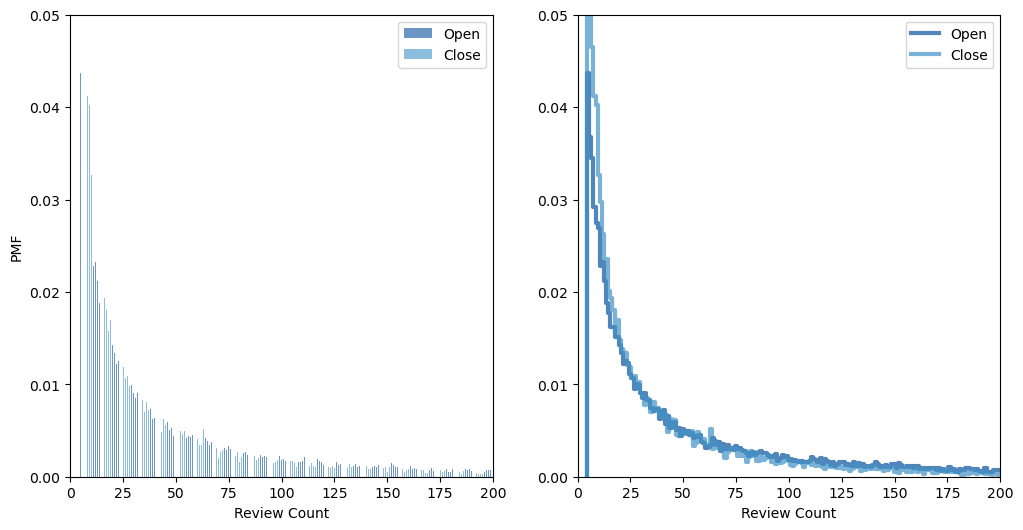

In [205]:
open_pmf = thinkstats2.Pmf(df_rest_open.review_count, label="Open")
close_pmf = thinkstats2.Pmf(df_rest_close.review_count, label="Close")

width = 0.2
axis = [0, 200, 0, .05]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(open_pmf, align="right"
               , width=width)
thinkplot.Hist(close_pmf, align="left", width=width)
thinkplot.Config(xlabel="Review Count", ylabel="PMF", axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([open_pmf, close_pmf])
thinkplot.Config(xlabel="Review Count", axis=axis)

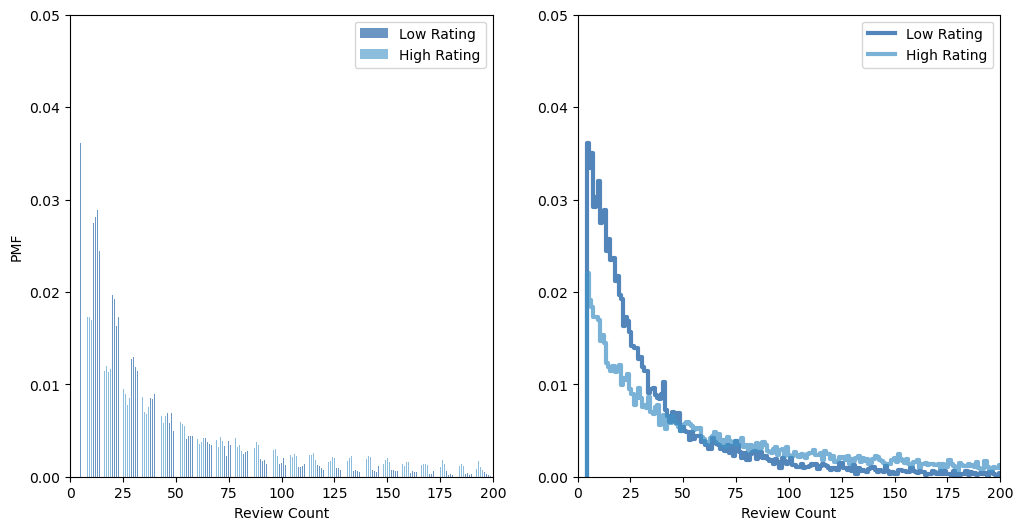

In [36]:
low_pmf = thinkstats2.Pmf(df_rest_low.review_count, label="Low Rating")
high_pmf = thinkstats2.Pmf(df_rest_high.review_count, label="High Rating")

width = 0.2
axis = [0, 200, 0, .05]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(low_pmf, align="right"
               , width=width)
thinkplot.Hist(high_pmf, align="left", width=width)
thinkplot.Config(xlabel="Review Count", ylabel="PMF", axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([low_pmf, high_pmf])
thinkplot.Config(xlabel="Review Count", axis=axis)

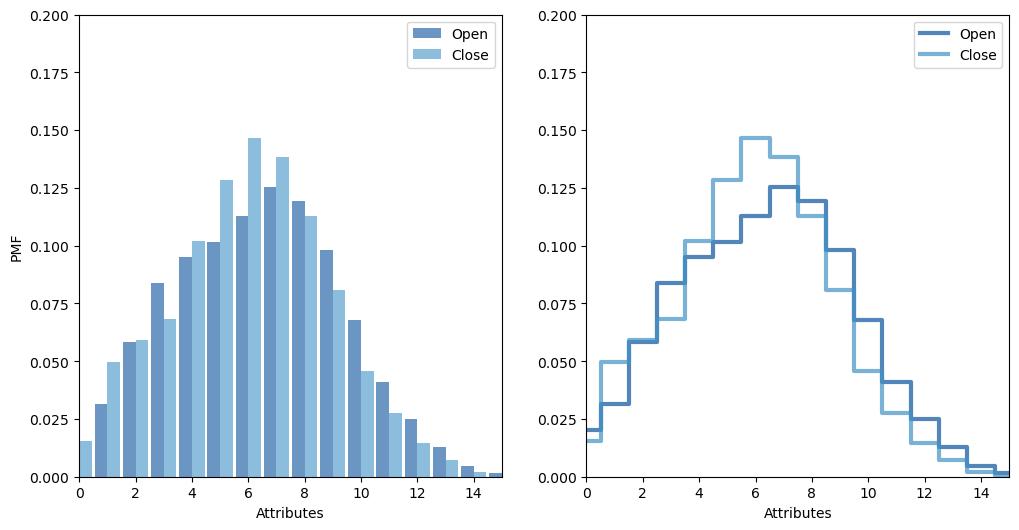

In [37]:
open_pmf = thinkstats2.Pmf(df_rest_open.attribute_count, label="Open")
close_pmf = thinkstats2.Pmf(df_rest_close.attribute_count, label="Close")

width = 0.45
axis = [0, 15, 0, 0.2]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(open_pmf, align="right", width=width)
thinkplot.Hist(close_pmf, align="left", width=width)
thinkplot.Config(xlabel="Attributes", ylabel="PMF", axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([open_pmf, close_pmf])
thinkplot.Config(xlabel="Attributes", axis=axis)


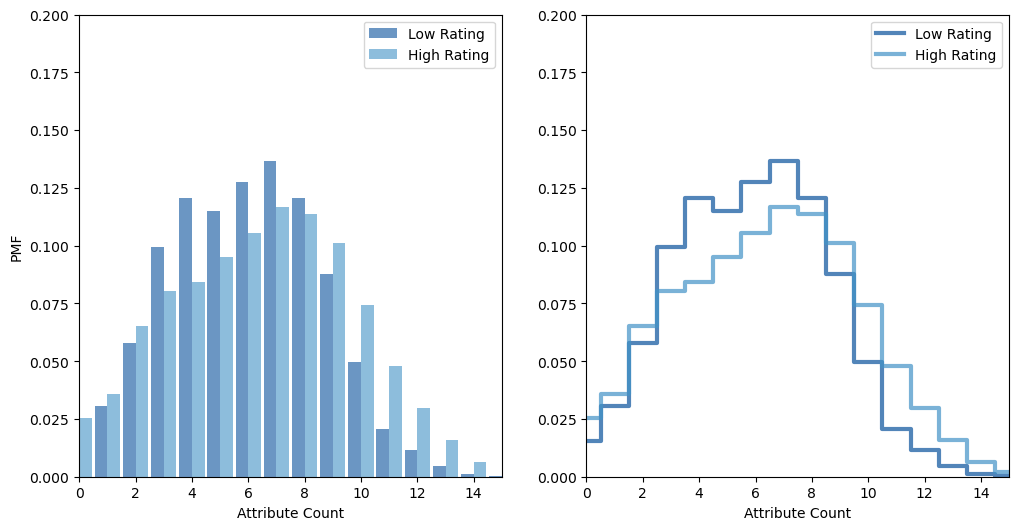

In [37]:
low_pmf = thinkstats2.Pmf(df_rest_low.attribute_count, label="Low Rating")
high_pmf = thinkstats2.Pmf(df_rest_high.attribute_count, label="High Rating")

width = 0.45
axis = [0, 15, 0, 0.2]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(low_pmf, align="right"
               , width=width)
thinkplot.Hist(high_pmf, align="left", width=width)
thinkplot.Config(xlabel="Attribute Count", ylabel="PMF", axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([low_pmf, high_pmf])
thinkplot.Config(xlabel="Attribute Count", axis=axis)

## CDF

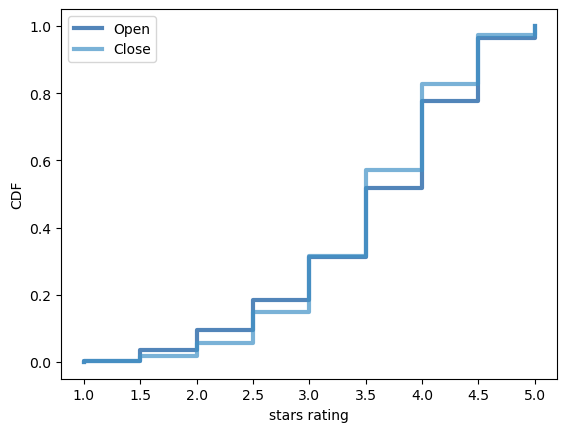

In [38]:
open_cdf = thinkstats2.Cdf(df_rest_open.stars, label='Open')
close_cdf = thinkstats2.Cdf(df_rest_close.stars, label='Close')

thinkplot.PrePlot(2)
thinkplot.Cdfs([open_cdf, close_cdf])
thinkplot.Config(xlabel='stars rating', ylabel='CDF')




# Analytical Distribution

In [39]:
review_count = df_rest_open.review_count.dropna()

stars = df_rest_open.stars.dropna()

Mean, Var 3.563 0.6733599473684214
Sigma 0.820585124998267


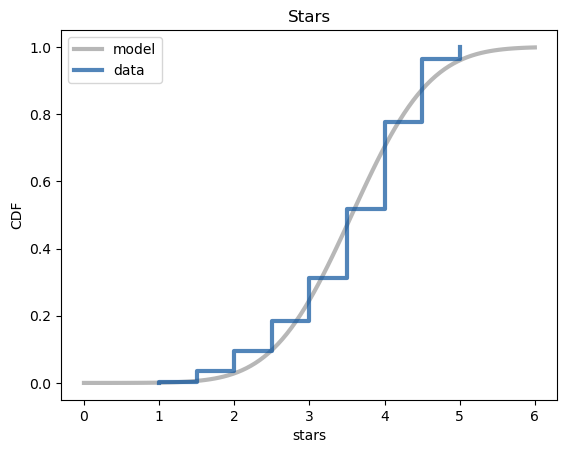

In [40]:
# estimate parameters: trimming outliers yields a better fit
mu, var = thinkstats2.TrimmedMeanVar(stars, p=0.01)
print("Mean, Var", mu, var)

# plot the model
sigma = np.sqrt(var)
print("Sigma", sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=6)

thinkplot.Plot(xs, ps, label="model", color="0.6")

# plot the data
cdf = thinkstats2.Cdf(stars, label="data")

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf)
thinkplot.Config(title="Stars", xlabel="stars", ylabel="CDF")

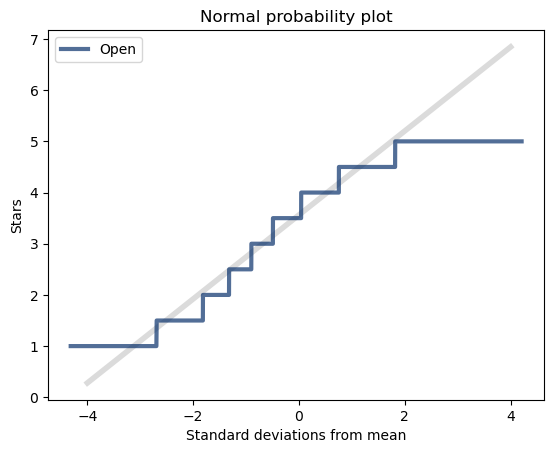

In [41]:
mean, var = thinkstats2.TrimmedMeanVar(stars, p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color='0.8')

xs, ys = thinkstats2.NormalProbability(stars)
thinkplot.Plot(xs, ys, label='Open')

thinkplot.Config(title='Normal probability plot',
                 xlabel='Standard deviations from mean',
                 ylabel='Stars')

Another One on Distribution

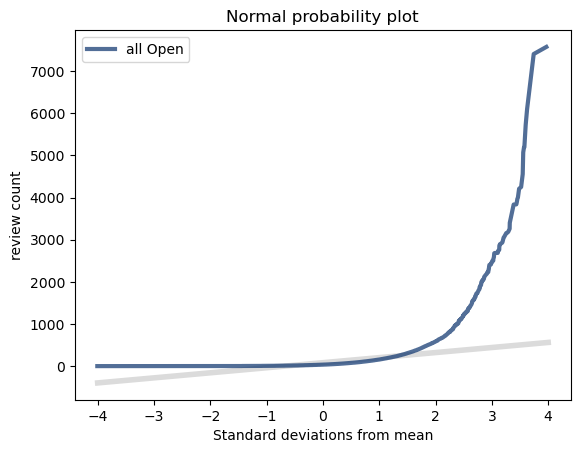

In [43]:
mean, var = thinkstats2.TrimmedMeanVar(review_count, p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color='0.8')

xs, ys = thinkstats2.NormalProbability(review_count)
thinkplot.Plot(xs, ys, label='all Open')

thinkplot.Config(title='Normal probability plot',
                 xlabel='Standard deviations from mean',
                 ylabel='review count')

# Correlation and Scatterplot

In [44]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

def SpearmanCorr(xs, ys):
    xs = pd.Series(xs)
    ys = pd.Series(ys)
    return xs.corr(ys, method='spearman')

def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov



In [45]:
df_rest_open = df_rest_open.dropna(subset=['stars',  'review_count', 'attribute_count'])

df_bus_comb = df_bus_comb.dropna(subset=['checkin_count',  'stars',  'review_count', 'attribute_count'])

attribute_count = df_bus_comb.attribute_count.dropna()

review_count = df_bus_comb.review_count.dropna()

stars = df_bus_comb.stars.dropna()

checkin_count = df_bus_comb.checkin_count.dropna()


In [63]:
df_bus_comb.columns


Index(['business_id', 'tip_counts', 'date', 'checkin_count', 'name', 'address',
       'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars',
       'review_count', 'is_open', 'attributes', 'categories', 'hours',
       'attribute_count', 'RestaurantsPriceRange2'],
      dtype='object')

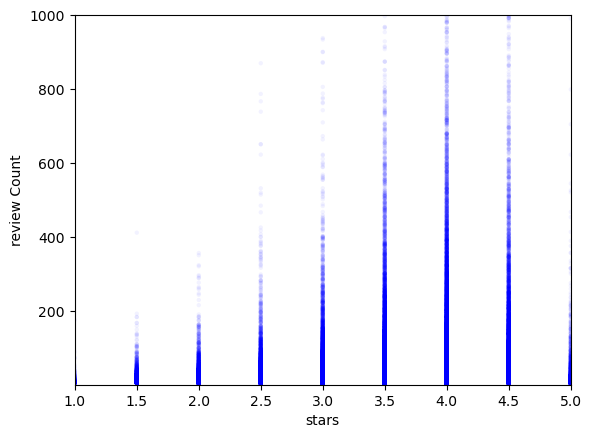

In [46]:
# Solution

thinkplot.Scatter(stars, review_count ,alpha=0.05, s=10)
thinkplot.Config(xlabel='stars',
                     ylabel='review Count',
                     ylim=[1, 1000],
                     xlim=[1, 5],
                     legend=False)

In [47]:
print('Corr', Corr(stars, review_count))
print('SpearmanCorr', SpearmanCorr(stars, review_count))
print('Covariance',Cov(stars, review_count))

Corr 0.14568418100101796
SpearmanCorr 0.19519178622241629
Covariance 22.052844099844034


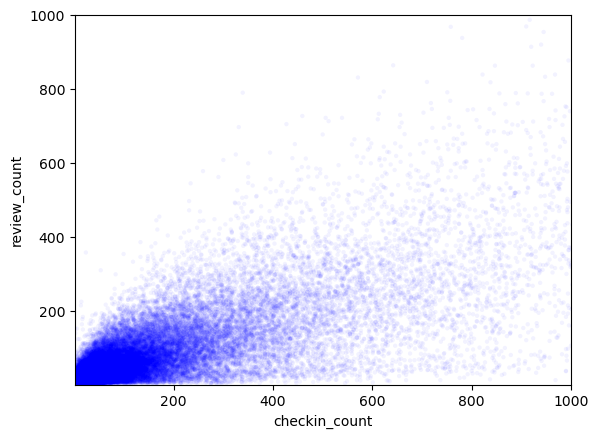

In [48]:
thinkplot.Scatter(checkin_count, review_count ,alpha=0.05, s=10)
thinkplot.Config(xlabel='checkin_count',
                     ylabel='review_count',
                     ylim=[1, 1000],
                     xlim=[1, 1000],
                     legend=False)

In [49]:
print('Corr', Corr(checkin_count, review_count))
print('SpearmanCorr', SpearmanCorr(checkin_count, review_count))
print('Covariance',Cov(checkin_count, review_count))

Corr 0.8008251078506773
SpearmanCorr 0.7837045416467736
Covariance 67712.82924752474


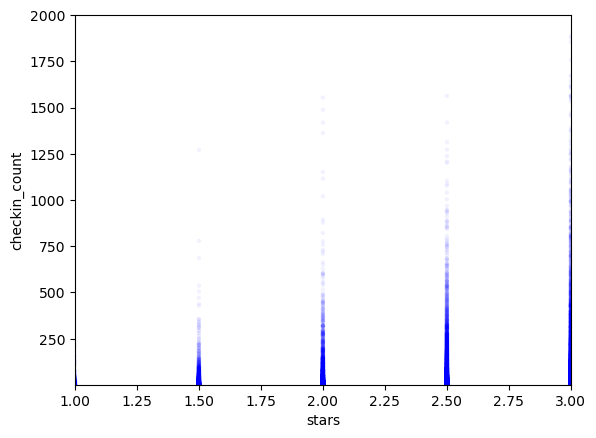

In [50]:
thinkplot.Scatter(stars, checkin_count ,alpha=0.05, s=10)
thinkplot.Config(xlabel='stars',
                     ylabel='checkin_count',
                     xlim=[1, 3],
                     ylim=[1, 2000],
                     legend=False)

In [51]:
print('Corr', Corr(stars, checkin_count))
print('SpearmanCorr', SpearmanCorr(stars, checkin_count))
print('Covariance',Cov(stars, checkin_count))

Corr 0.08796690017658026
SpearmanCorr 0.07126716557100297
Covariance 33.41078618529671


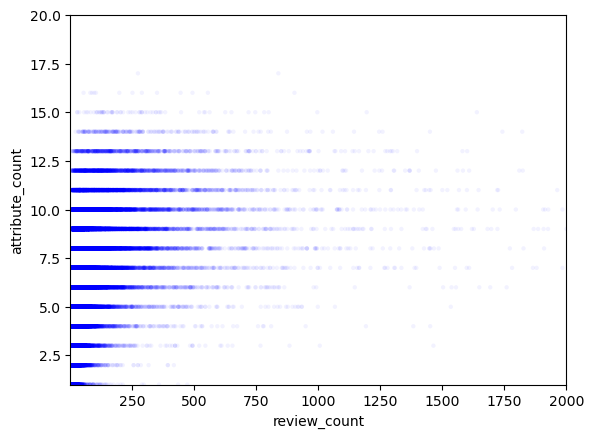

In [52]:
# Solution

thinkplot.Scatter(review_count, attribute_count, alpha=0.05, s=10)
thinkplot.Config(xlabel='review_count',
                     ylabel='attribute_count',
                     xlim=[1, 2000],
                     ylim=[1, 20],
                     legend=False)

In [53]:
print('Corr', Corr(review_count, attribute_count))
print('SpearmanCorr', SpearmanCorr(review_count, attribute_count))
print('Covariance',Cov(review_count, attribute_count))

Corr 0.31927606492033067
SpearmanCorr 0.5742289489255746
Covariance 173.157054158197


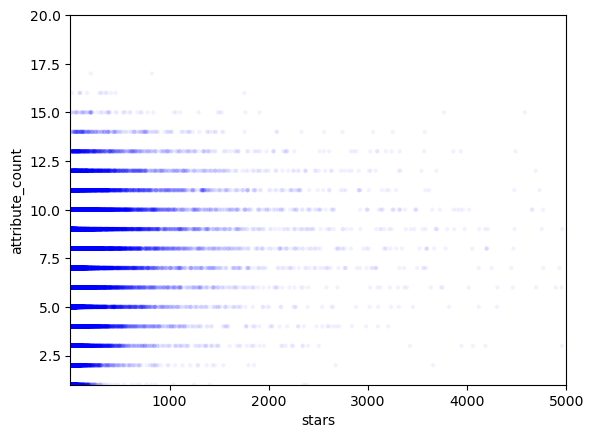

In [54]:
thinkplot.Scatter(checkin_count, attribute_count, alpha=0.05, s=10)
thinkplot.Config(xlabel='stars',
                     ylabel='attribute_count',
                     xlim=[1, 5000],
                     ylim=[1, 20],
                     legend=False)

In [55]:
print('Corr', Corr(checkin_count, attribute_count))
print('SpearmanCorr', SpearmanCorr(checkin_count, attribute_count))
print('Covariance',Cov(checkin_count, attribute_count))

Corr 0.211411244155818
SpearmanCorr 0.43643528850492763
Covariance 287.68492497511863


## Hypothesis Testing

Null hypothesis (H0): There is no correlation between business star rating and number of check-ins

Alternative hypothesis(HA): correlation exists between the business star rating and the number of check-ins


In [56]:
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [57]:
data = df_bus_comb.checkin_count.values, df_bus_comb.stars.values
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue


0.0

The reported p-value is 0, which means that in 1000 trials we didn't see a correlation, under the null hypothesis, that exceeded the observed correlation.  That means that the p-value is probably smaller than $1/1000$, but it is not actually 0.

To get a sense of how unexpected the observed value is under the null hypothesis, we can compare the actual correlation to the largest value we saw in the simulations.

In [58]:
ht.actual, ht.MaxTestStat()

(0.08796690017658026, 0.014799143148657337)

## Regression Analysis

In [59]:
import statsmodels.formula.api as smf
model = smf.ols('stars ~ checkin_count + review_count + attribute_count', data=df_checkin_bus)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  stars   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     441.6
Date:                Sat, 04 Mar 2023   Prob (F-statistic):          5.35e-284
Time:                        08:18:23   Log-Likelihood:                -78717.
No. Observations:               63296   AIC:                         1.574e+05
Df Residuals:                   63292   BIC:                         1.575e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.5163      0.007    474.702      0.000       3.502       3.531
checkin_count      -0.0001   1.28e-05    -11.658      0.000      -0.000      -0.000
review_count        0.0010   3.31e-05     29.526      0.000       0.001       0.001
attribute_count    -0.0037      0.001     -3.204      0.001      -0.006      -0.001
==============================================================================
Omnibus:                     2721.281   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3068.127
Skew:                          -0.535   Prob(JB):                         0.00
Kurtosis:                       2.866   Cond. No.                     1.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""